# Pymaceuticals Inc.
---
Note: Most of the coding I've done on this was learned from class, however I did consult with classmates on the coding to isolate and remove the repeated datapoint and identifying the quartiles and outliers as I was having a problem with it not being able to do the quantile fundtion with a list.
I did use https://www.geeksforgeeks.org/ for some of the formatting of plotting graphs  to make sure that I had all the parts of the function written out.

### Analysis

I think the main takeaway from looking at all the data and the visualization of the data is that Capomulin and Ramicane appear to have the more effective treatment of tumor size. There were only a few minor errors with the data in terms of repeated data that had to be cleaned, and the split between the sexes of the mice was almost perfectyl even, so on the surface there doesn't appear to be anything that would challenge the validity of the results of this data; however, one piece of information that would be good to know that a data analyst would likely look at or have access to is what the relative size of the tumors at the beginning of the study. I would assume that they would have been around the same size, which would mean our conclusion of Capomulin and Ramicane having the more effective treatment is valid; however, if they are not, the same size it would have been useful to look at the mean size from the first timepoint compared to the mean size from the end timepoint. Of course, that only matters if the goal of this analysis is to find which treatment had the most effective results compared to start and ending tumor size. If this was a data analyst for the marketing team of Capomulin or Ramicane, that likely wouldn't matter as they could just advertize that they had lower ending tumor size than the competition regardless of what the start size is.

Another part of the data that I found interesting was how the tumor size didn't just go down in the line graph showing timepoint vs tumor size. It trended down over time, but it would go up and down as it went with the spikes up looking to happen less frequently. The mouse that I chose to do the line graph for also ended on an up trend, which is interesting as it would affect how we may want to communicate the data. If I'm looking at the overall tumor change, I an either look at the start of trial vs the end of trial, which would be a smaller change for Capomulin;however, if I want to look at the change from maximum to minimum tumor size for this particular mouse, it looks much more effective as the tumor grew in the early stages of the trial, and the smallest tumor size is actually right before the end of the trial. I think one of the things that just keeps being reinforced in these challenges is how much data can be manipulated depending on what you are looking for.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\corym\OneDrive\Documents\Data_Analytics_Bootcamp\Challenge 5\Starter_Code (2)\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\corym\OneDrive\Documents\Data_Analytics_Bootcamp\Challenge 5\Starter_Code (2)\Starter_Code\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_combined = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = data_combined["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatedata = data_combined.loc[data_combined.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicatedata

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = data_combined.loc[data_combined["Mouse ID"]== "g989", :]
g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_combined[data_combined["Mouse ID"].isin(duplicatedata)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleanmouse_count = clean_data["Mouse ID"].nunique()
cleanmouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_data["Drug Regimen"]

meantumor = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mediantumor = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
vartumor = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdevtumor = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
semtumor = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
mouse_summary = pd.DataFrame({"Mean Tumor Volume":meantumor,
                             "Median Tumor Volume": mediantumor,
                             "Tumor Volume Variance": vartumor,
                             "Tumor Volume Std. Dev.": stdevtumor,
                             "Tumor Volume Std. Error": semtumor})
mouse_summary
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
mouse_agg = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
clean_data.groupby(["Drug Regimen"]).agg(mouse_agg)
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
countperdrug = clean_data["Drug Regimen"].value_counts()
countperdrug

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0.5, 1.0, 'Mice Observed by Drug Regimen')

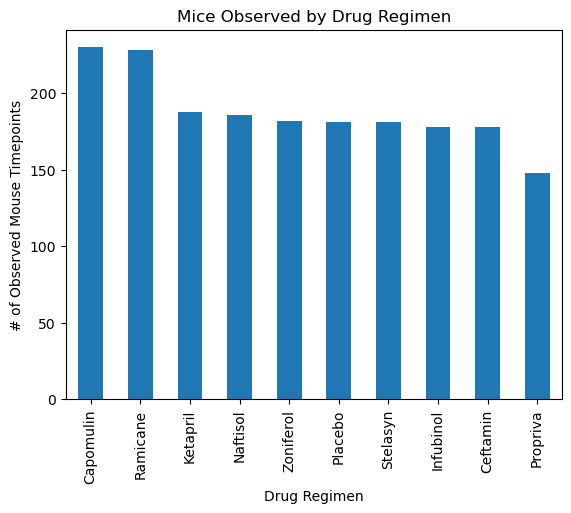

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

plot_bar = countperdrug.plot.bar( x="Drug Regimen", y=countperdrug)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mice Observed by Drug Regimen")

Text(0.5, 1.0, 'Mice Observed by Drug Regimen')

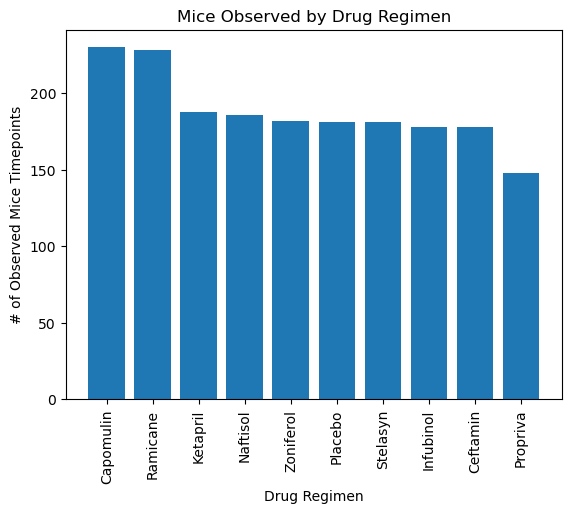

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = countperdrug.index.values
plt.bar(x_axis, countperdrug)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoints")
plt.title("Mice Observed by Drug Regimen")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderdata = clean_data["Sex"].value_counts()
genderdata

Sex
Male      958
Female    922
Name: count, dtype: int64

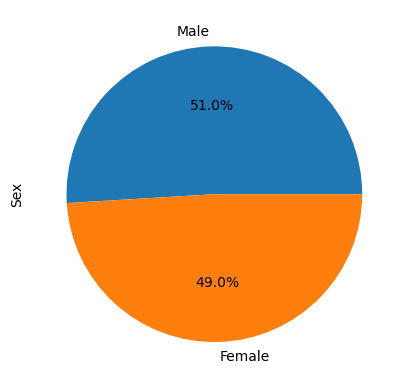

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

plot_pie = genderdata.plot.pie(ylabel="Sex",autopct="%1.1f%%")


<function matplotlib.pyplot.show(close=None, block=None)>

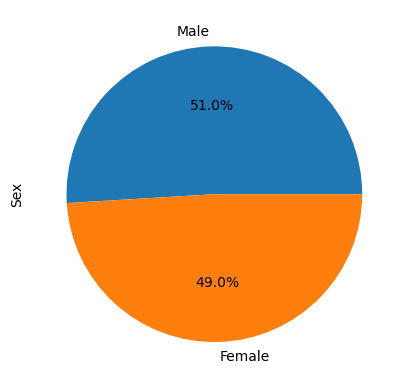

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y = genderdata
labels = ["Male", "Female"]
plt.pie(y,labels=labels,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
maxtimepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
maxtimepointdf=pd.DataFrame(maxtimepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timemerge=pd.merge(maxtimepointdf,clean_data, on =("Mouse ID", "Timepoint"), how = "left")
timemerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capovol = []
ramivol = []
infuvol = []
ceftavol = []

for i in range(len(timemerge)-1):
    if timemerge.loc[i, "Drug Regimen"] == "Capomulin":
        capovol.append(timemerge.loc[i, "Tumor Volume (mm3)"])
    if timemerge.loc[i, "Drug Regimen"] == "Ramicane":
        ramivol.append(timemerge.loc[i, "Tumor Volume (mm3)"])
    if timemerge.loc[i, "Drug Regimen"] == "Infubinol":
        infuvol.append(timemerge.loc[i, "Tumor Volume (mm3)"])
    if timemerge.loc[i, "Drug Regimen"] == "Ceftamin":
        ceftavol.append(timemerge.loc[i, "Tumor Volume (mm3)"])
allvol = [capovol, ramivol, infuvol, ceftavol]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
allvol = [capovol, ramivol, infuvol, ceftavol]
outliers = []
for i in range(len(allvol)):
    quartiles = pd.Series(allvol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes (already did)
    # add subset 
    # Determine outliers using upper and lower bounds
    for j in range(len(allvol[i])):
            if (allvol[i][j] < lower_bound) or (allvol[i][j] > upper_bound):
                outlier = allvol[i][j]
                outliers.append(outlier)
                print(f"The outliers are {outliers}.")
    



Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.3213458].

Ceftamin:
Th

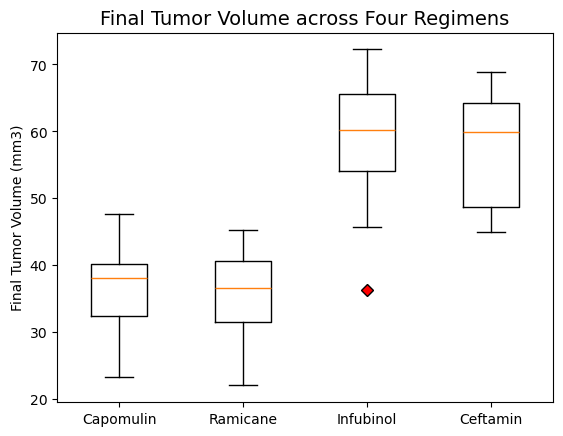

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_diamond = dict(markerfacecolor = "r", marker = "D")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(allvol, flierprops = red_diamond)
ax1.set_title("Final Tumor Volume across Four Regimens", fontsize = 14)
ax1.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomice = timemerge.loc[timemerge["Drug Regimen"] == "Capomulin"]
capomice.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


In [31]:
# Isolate data for Mouse b128
b128data = clean_data.loc[clean_data["Mouse ID"] == "b128"]
b128data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


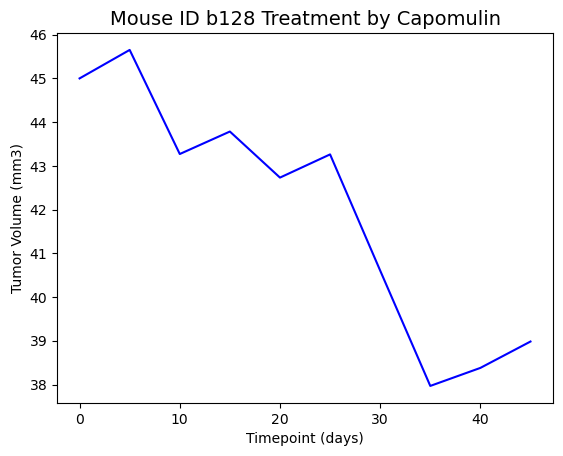

In [32]:
plt.plot(b128data["Timepoint"],b128data["Tumor Volume (mm3)"], color = "blue")
plt.title("Mouse ID b128 Treatment by Capomulin", fontsize = 14)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

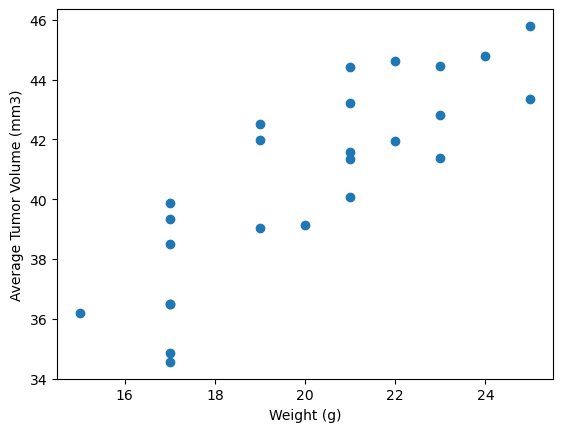

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_weight_tumor = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
capo_tumor_avg = capo_weight_tumor["Tumor Volume (mm3)"].mean()
capo_weight = capo_weight_tumor["Weight (g)"].unique()
plt.scatter(capo_weight, capo_tumor_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


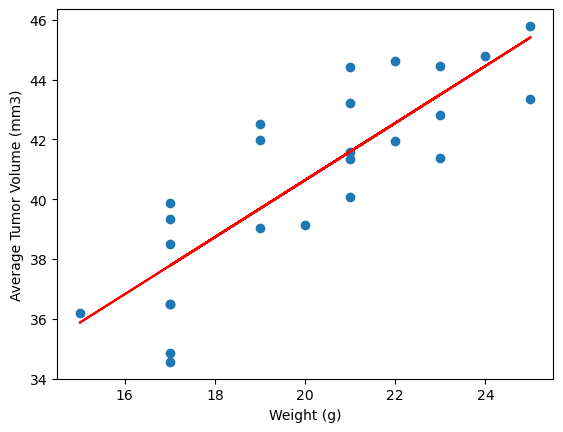

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capo_weight = capo_weight.astype(float)
correlation = st.pearsonr(capo_weight, capo_tumor_avg)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_weight, capo_tumor_avg)
regression = capo_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capo_weight, capo_tumor_avg)
plt.plot(capo_weight,regression,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()